## Statistical Methods in Python For Rare Event Searches

*Summer Course at Canfranc Underground Laboratory (LSC) July 2019*

### Lecture IV

## Hypothesis testing - composite case

*Author: Jose A. Hernando*, June 2019

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*

In [1]:
import time

print( ' Last Execution ', time.asctime())

 Last Execution  Wed Jul 10 13:47:00 2019


These is a series of lectures on statistical method for rare searches in Particle Physics in Python. Emphasis is put on Hypothesis testing and Confidence Intervals. They are based on the excellent lectures on statistics by Prosper [1], Cowan [2] and Cranmer[3] given at CERN Academic Training.

We will use the Python scientic toolkits, Matplotlib, Numpy, Scipy, that are distributed with Anaconda Python [9]. 


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as optimize

# possible styles: ggplot (simplicity), bmh (scientify data), 
plt.style.context('seaborn-colorblind')

import htcore     as htcore
import httoys     as httoys
import htcatalog  as htcata
import htplot     as htplot
import htcomposite_examples as htexam

# ploting images
from IPython.display import display, Image

----

## Introduction

We have considered the case of an alternative **single** hypothesis $H_1$ with respect the null hypothesis $H_0$. 

But in some cases, the hypothesis depends on a parameter(s), the **strength parameter, $\mu$**. That is $H_1(\mu)$, with $H_1(\mu = \mu_0) = H_0$. These are **composite** cases.

For example, we search for a neutrino-less double beta decay, we we do know the half-life time. Or we search for a dark-matter candidate but we do know not its cross-section.

The result of a composite hypothesis testing is now a confidence interval on the $\mu$ parameter.

In manu cases the Wilk's theorem allow us to treat the problem without requiring massive simulations.

----

## 1. Profile likelihood scan

Let's consider a simple example. The null hypothesis a gaussian with $\mu_0=0$ and sigma unity. And the alternative is a gaussian with $\mu$ positive and sigma one.

The separation of the gaussian will indicate when and what are the values of $\mu$ "compatible" with observations.

If $\mu = 3$ half of the observations will indicate an observation at Z=3, and if $\mu=5$ halft of the observation will imply discovery or Z=5.

In the other hand, if $\mu_{true} = 0$ we can set an upper limit at 90% CL at 1.28 Z, (the maximum value of $\mu$ which gaussian penetrates in the negative region 10%), in 50% of the cases. 

**Explore** withe the $\mu$ separation between both gaussian. Modify also $\sigma$ of the gaussian.

observed data : [-0.50924861]
H0 p-value    : 0.6947110127039602
H1 p-value    : 0.002937978229809435
CLs           : 0.0096235971557024


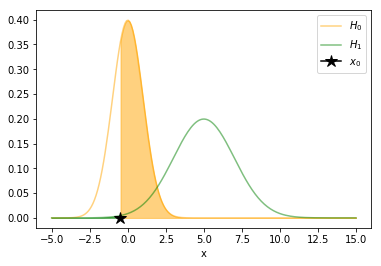

In [3]:
mu = 5.
httoys.gaussian(0., mu, sigma1 = 2.);

To set the FC CI we compute , $\hat{\mu}(x)$, the best-estimate of $\mu$ given a data $x$.

Usually  $\hat{\mu}(x)$ is estimated as the value that maximizes the likelihood $\mathcal{L}(x | \mu)$, that is the MLE (Maximum Likelihood Estimate).

We can then relate the likelihood of an event $x$ with respect an hypotesis $\mu$, $\mathcal{L} (x |\mu)$, with the likelihood of the best-estimate $\mathcal{L}(x |\hat{\mu}(x))$ for this event. 

We can introduce the variable (-2 log) likelihood ratio (à la FC):

$$
t_\mu( x) = -2 \ln \, \frac{ \mathcal{L}( x \, | \mu)}{ \mathcal{L}( x \, | \, \hat{\mu}( x))}
$$

We **order** events acording to $t_\mu(x)$ for a given $\mu$. 

We consider events compatible with $\mu$ at $\beta$ CL those with are in the $\beta$ % of the lower values of the $t_\mu$ distribution. 

In certain cases, when the number of observed data by an experiment is 'large', the $t_\mu(x)$ has the nice property that its pdf, $g(t_\mu)$, is known is a $\chi^2$ distribution with one degree-of-freedom.

This is a consequence of the **Wilk's theoreme**.

Therefore, we first need to check if our case fulfills Wilk's conditions, via the goodness-of-fit of the $t_\mu$ distribution to a $\chi^2(1)$.

Usually if the likelihood is regular enough and the estimates are guassian distributed the Wilk's conditions are fulfilled.

Note: We are use to this property in *regresion* of the parameters with the MLE! 
We do the likelihood scan around the bes-estimate!

Let's consider a simple example, a gaussian distribution.

**Example**: Consider a gaussian distribution with unknown postive mean $\mu$ and sigma one, while the null hypothesis is $\mu_0 = 0$ and sigma one. Let's verify that this case fulfill that $t_\mu$ is distributed with a $\chi^2(1)$.

**Question:** Verify analytically in the previous case, a gaussian distribution, that $t_\mu$ follows a $\chi^2(1)$ pdf.

muhat :  0.02068868750000005 , std 1.0385963969889536


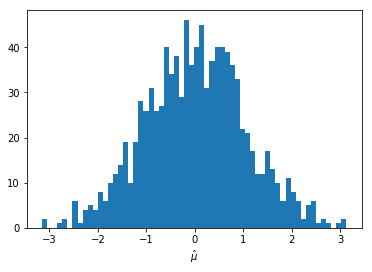

In [4]:
mu, sigma, size  = 0., 1., 1000
par, mask = (mu, sigma), (True, False)
rv        = stats.norm
xs        = rv.rvs(mu, sigma, size = size)
ht        = htcore.htcomposite(rv, par, mask = mask)
muhats    = [float(ht.mubest(xi))  for xi in xs]
tmus      = [ht.tmu(xi, mu)        for xi in xs]
print('muhat : ', np.mean(muhats), ', std', np.std(muhats))
plt.hist(muhats, 60); plt.xlabel(r'$\hat{\mu}$');

chi2  1.0791105611923424
p-value mean : 0.5124500250139882 ; std * sqrt(12.) : 1.0062965465602447


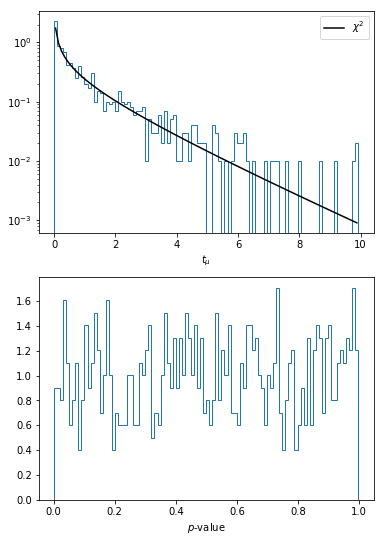

In [5]:
htplot.chi2_test(tmus, nbins = 100, label = r'$t_\mu$')

**Exercise**: Consider the case of a poisson distribution with a unknown mean $\mu$ and the null hypothesis $\mu_0$. Check for what values of $\mu$ for whose $t_\mu$ follows a $\chi^2(1)$ distribution.

**Exercise**: Consider the case of an experiment that get a sample of n-size poisson disbruted values, $x$ with a unknown mean $\mu$. Check the values of $n$ for whose $t_\mu$ follows a $\chi^2(1)$ distribution.

### 1.1 Profile likelihood ratio 

We can now invert the situation, and given a observed data $x_0$, we can provide a CI on $\mu$, for whose vaules, $x_0$ is not an extreme observation, that is has not a $p$-value $<1-\beta$ at a $\beta$ CL.

There is a simple relation between $t_\mu$ and its p-value, $p_\mu$, via the $\chi^2(1)$ distribution:

$$
p_\mu = 2 \, (1 - \Phi(\sqrt{t_\mu}))
$$

Where $\Phi(x)$ is the comulative function of a normal gaussian.

We can no:

1) define a CI of $\mu$ at $\beta$ CL, for those values wich $p_\mu >= 1-\beta$.

2) clain observation (discovery) of $H_1(\mu_0)$ has a $p_0$, a Z-value $\ge 3$ (5).

**Example**: Consider a gaussian distribution with fix sigma and unknown $\mu$, and the null hypothesis is $\mu_0$. Generate an observation data, $x_0$, and compute the CI of $\mu$ at $\beta$ CL using the $t_\mu$ variable. Consider $\mu=3$ and $\beta = 0.68$.

In [6]:
mu, sigma, size = 3., 1., 1
par, mask       = (mu, sigma), (True, False)
rv              = stats.norm
ht              = htcore.htcomposite(rv, par, mask = mask)

x0      = rv.rvs(*par, size = size)
parbest = ht.parbest(x0)

print('observed data ', x0, ', best par ', parbest)

observed data  [3.97561581] , best par  [3.97558594 1.        ]


central CI  : [2.98115793 4.97007369] at  68 % CL


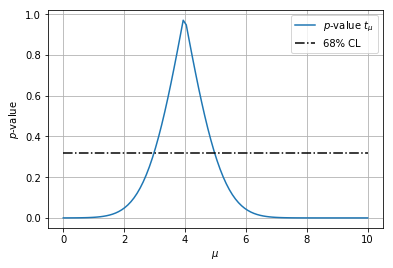

In [7]:
mu0, mu1, nmus, beta = 0, 10, 100, 0.68
mus   = np.linspace(mu0, mu1, nmus)
tmus  = [ht    .tmu(x0, mui, parbest = parbest) for mui  in mus]
ptmus = [htcore.tmu_pvalue(tmui)                for tmui in tmus]
ci     = ht.tmu_cint(x0, beta = beta)

htplot.prt_wilks_pvalues(beta, ci_central = ci)
htplot.plt_wilks_pvalues(beta, mus, ptmus = ptmus);

### 1.2 testing the null-hypothesis

In same cases the strength parameter $\mu \ge \mu_0$, therefore the values of $\hat{\mu}(x) \lt \mu_0$ do not challenge $H_0$.

If we define:

$$
\lambda(\mu) = \frac{\mathcal{L}(x | \mu)}{\mathcal{L}(x | \hat{\mu}(x))}
$$

Verifying the compatibility with $\mu_0$ (goodness-of-fit) we can use:

$$
q_0 = \left\{ \begin{array}{ll} 
-2 \ln \lambda(\mu_0) & \mbox{if $\hat{\mu}(x) > \mu_0$} \\
0 & \mbox{if $\hat{\mu}(x) \le \mu_0$}
\end{array} \right.
$$

Now the pdf of $q_0$, $g(q_0 \, | \mu_0)$, will be now a "half" $\chi^2$ distribution. 
In this case there is even a simple relation with the $p$-value of $H_0$, the *goodness-of-fit* of $H_0$.

$$
p_0 = 1-\Phi(\sqrt{q_0})
$$

That translates directly into number of sigmas, $Z$:
$$
Z = \sqrt{q_0}
$$

**Example**: In the case of a gaussian hypothesis with mean $\mu$ positive and sigma one, and the null hypothesis $\mu_0 = 0$. Generate an observation data for the case $\mu_{true} = 3$ and compute the $p$-value and $Z$-value of $H_0$.

In [8]:
mu0, mutrue, sigma, size = 0., 3., 1., 1
par, mask                 = (mutrue, sigma), (True, False)
x0    = stats.norm.rvs(*par, size = size)
ht    = htcore.htcomposite(stats.norm, par, mask = mask)

parbest = ht.parbest(x0)
q0      = ht.q0(x0, mu0)
p0      = htcore.q0_pvalue(q0)
print('x0 ', float(x0), 'parhat ', parbest)
print('q0 ', q0, 'p-value', p0, 'Z-value', np.sqrt(q0))

x0  4.762514802278582 parhat  [4.7625 1.    ]
q0  22.68154724170349 p-value 9.559758400445872e-07 Z-value 4.762514802255579


**Exercise** Verify that the $q_0$ distribution is a 'half'-$\chi^2$.

### 1.3 Testing the alternative hypothesis

To set a **upper** limit on the value of $\mu$, the $\hat{\mu}$ above $\mu$ do not challege the alternative hypothesis, and we can simpler construct:

$$
q_\mu = \left\{ \begin{array}{ll} 
-2 \ln \lambda(\mu) & \mbox{if $\hat{\mu} \le \mu$} \\
0 & \mbox{if $\hat{\mu} \gt \mu$}
\end{array} \right.
$$

Again the pdf, $g(q_\mu | \mu)$  is a "half" $\chi^2$ distribution when $\mu = \mu_{true}$.

And computing p-value of the $H_1(\mu)$ hypothesis is very simple:

$$
p_\mu = 1 - \Phi(\sqrt{q_\mu})
$$

This $p_\mu$-value allow us to compute the upper limit on $\mu$.

**Example** Consider a gaussian distributed with mean $\mu_0 = 0$ and sigma 1. Generate an experiment, compute $q_\mu$ for $\mu = 3$. Set the upper limit on $\mu$ at 90% CL.

In [9]:
mu, mutrue, sigma, size, beta = 3., 0., 1., 1, 0.90
par, mask                 = (mutrue, sigma), (True, False)
ht  = htcore.htcomposite(stats.norm, par, mask = mask)

x0      = stats.norm.rvs(*par, size = size)
parbest = ht.parbest(x0)
qmu     = ht.qmu(x0, mu)
pqmu    = htcore.qmu_pvalue(qmu)
muup    = ht.qmu_ulim(x0, beta = 0.9)

print('x0  ', x0 , 'parbest ', parbest);
print('qmu ', qmu, 'p-value ', pqmu, ' at mu ', mu)
htplot.prt_wilks_pvalues(beta, ci_upper = muup)

x0   [-0.66999415] parbest  [-0.67  1.  ]
qmu  13.46885703357759 p-value  0.00012127801152739259  at mu  3.0
upper limit : [0.61155742] at  90 % CL


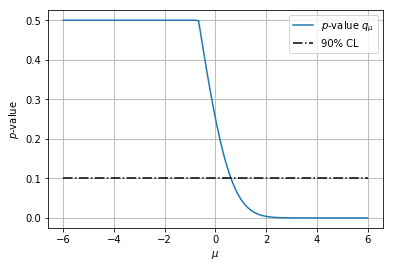

In [10]:
mu0, mu1, nmus = -6., 6., 100
mus    = np.linspace(mu0, mu1, nmus)
qmus   = [ht    .qmu(x0,  mui, parbest = parbest) for mui in mus]
pqmus  = [htcore.qmu_pvalue(qmui)                 for qmui in qmus]
htplot.plt_wilks_pvalues(beta, mus, pqmus = pqmus);

**Exercise**: Consider an experiment with a gaussian distribution with mean $\mu$ and sigma 1. Consider $\mu_{true} = \mu_0 = 0$. Obtain the distribution of the upper limits at 90 %CL. 

**Exercise** Consider a experiment with a $n$ sample of gaussian distributed values with $\mu$ and sigma 1. Consider $\mu_{true} = \mu = 3.5$, verify that $q_\mu$ follows a half-$\chi^2$ distribution with one dof.

---

## 5. Nuissance parameters 

Consider a counting experiment with a control region that is $\tau$ times larger than the signal region. In both regions the expected background events is $\nu$, while in the signal region $\nu + \mu$. 

**Explore** in the following toy the generation of some events, with different values of $\nu$, $\mu$.

We are interested on measuring $\mu$ and estimating $\nu$ from the control sample. $\nu$ is a nuisance parameter, how we can treat it?

bkg events : 37 signal events : 4


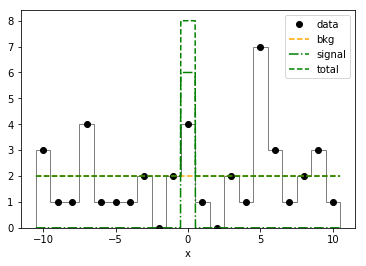

In [11]:
mu, nu, tau = 6, 2, 20
httoys.poisson_control_rvs(mu, nu, tau, tau + 1);

We have seen that one option to deal with the nuissance parameters was to marginalize the pdf is possible.

Another possibility, is to extend the likelihood to estimate the nuisance parameter, $\nu$, and use:

$$
t_\mu = -2 \ln \frac{\mathcal{L}(x \, | \mu, \, \hat{\nu}(\mu))}{ \mathcal{L}(x \, | \, \hat{\mu}, \hat{\nu} )}
$$

where $\hat{\nu}$ is the best estimate given $x$, and $\hat{\nu}(\mu)$ is the best estimate when fixing $\mu$ and given $x$.


And use the test statistics $q_0$ and $q_\mu$ to test the null and the composite hypothesis. And $t_\mu$ to define the CI.

**Example:** Consider an experiment that search for a signal $\nu+\mu$. The background, $\nu$, is measured in a independent region, called *control* region, where there is no signal, and an expected background $\tau \nu$, where $\tau$ is known. Consider $\nu$ as the nuisance parameter. The experiment observes $k$ events in the control and signal region. Consider an experiment with $k=4$, $\tau = 40$, $\nu = 2$ and $\mu = 10$. What is the range of $\mu$ excluded at 90 %CL. Compute $q_0$, is there a discovery, obserrvation? 

This is a prototype of a search. The pdf is:

$$
g(n, \, m \, | \, \mu, \, \nu) = \frac{(\nu+\mu )^m \, e^{-(\nu + \mu)}}{m!} \, \frac{(\tau \nu)^n \, e^{-\tau \nu}}{n!}
$$

where $m$ are the events in the control region and $n$ are the events in the signal region. 


**Exercise**: First, we check that $t_\mu(\mu, \nu)$ is approximatelly a $\chi^2$ with 2 dof, and $t_\mu(\mu, \hat{\nu}(\mu))$ a $\chi^2$ with one dof.

**Example**: Generate an observed data, $x_0$. for an experiment with a control and a signal region. The control region follows a poisson with $\tau \nu$, and the signal $\nu + \mu$. Consider the case $\tau = 20$, $\nu = 2$ and $\mu = 6$.

Compute:

a) The p-value with the null hypothesis $\mu=0$.

b) The lower value of the upper CI at 90% using $q_\mu$

c) the central CI at 90% CL using $t_\mu$

In [12]:
mu, nu, tau = 6., 2., 20.
par, mask, masknu  = (mu, nu, tau), (True, True, False), (False, True, False)

# generate an observation and obtain the best-estimate of mu, nu and nu given mu
rv      = htcata.poisson_control_signal
x0      = rv.rvs(*par, size =1)[0]
ht      = htcore.htcomposite(rv, par, mask = mask, masknu = masknu) 
parbest = ht.parbest(x0)
nubest  = ht.parmubest(x0, mu)

print('mu, nu true   :', mu, nu)
print('events in control, signal region :', x0[0], x0[1])
print('events in control region/tau     :', x0[0]/tau)
print('par best :', parbest)
print('par best :', nubest, ' fix mu at ', mu)

mu, nu true   : 6.0 2.0
events in control, signal region : 46.0 9.0
events in control region/tau     : 2.3
par best : [ 6.70000246  2.29999557 20.        ]
par best : [ 6.          2.30957031 20.        ]  fix mu at  6.0


In [13]:
mu0, mu1, nmus = 2., 20., 100
mus    = np.linspace(mu0, mu1, nmus)
# compute q0 for null hypotesis
# compute tmu(mu, nuhat), qmu(mu, nuhat) for a range of mu
q0     = ht.q0(x0, 0.)
tmus   = [ht.tmu      (x0, mi, parbest = parbest) for mi in mus]
qmus   = [ht.qmu      (x0, mi, parbest = parbest) for mi in mus]

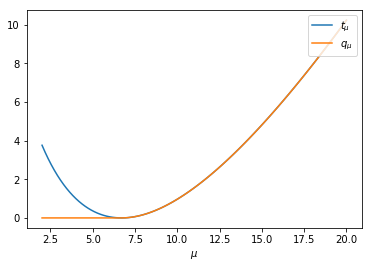

In [14]:
plt.plot(mus, tmus, label = r'$t_\mu$');
plt.plot(mus, qmus, label = r'$q_\mu$');
plt.xlabel(r'$\mu$')
plt.legend(loc = 1);

In [15]:
# compute the CI using tmu, and upper limit using qmu
beta = 0.90
pts = [htcore.tmu_pvalue(tmu) for tmu in tmus]
pqs = [htcore.qmu_pvalue(qmu) for qmu in qmus]
ci_upper   = ht.qmu_ulim(x0, beta = beta, parbest = parbest);
ci_central = ht.tmu_cint(x0, beta = beta, parbest = parbest);

H0 p-value  0.0006766040799403017 Z-value  3.2044499490690663
upper limit : [11.12920398] at  90 % CL
central CI  : [ 2.57456007 12.5971063 ] at  90 % CL


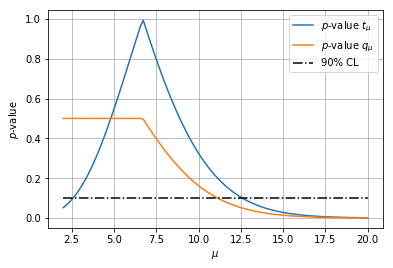

In [16]:
print('H0 p-value ', htcore.q0_pvalue(q0), 'Z-value ', np.sqrt(q0))
htplot.prt_wilks_pvalues(beta, ci_central, ci_upper)
htplot.plt_wilks_pvalues(beta, mus, pts, pqs)

**Example**: Generate now $m$ experiments, and obtain the $\hat{\mu}, \hat{\nu}$ distributions.

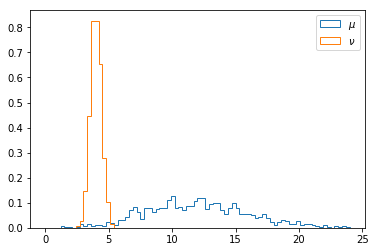

In [17]:
mu, nu, tau, size  = 12., 4., 20., 1000
htexam.poisson_control_muhat_hist(mu, nu, tau, size)

**Example** In the following plot we show the p-value of the an observed data $x_0$ in the plane $(\mu, \nu)$. They are computed assuming that $t_\mu(x)$ follows a $\chi^2$ pdf with 2 dof. The start in the plot is best-estimate point, $(\hat{\mu}, \hat{\nu})$, and the line the best nuisance parameter $\hat{\nu}(\mu)$ as a funcion of $\nu$. 

Notice that at p-value 0.1 corresponde the CI region of 90% CL and the proyection onto the $\mu$ axis in the 90% CL for the $\mu$ parameter when $\nu$ is considered a nuisance.

data     : (48.0, 19.0)
best par : [14.20002862  4.79999947]
central CI : [ 7.78105847 22.36869044]


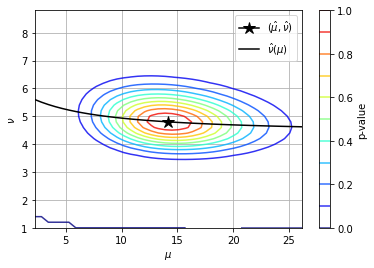

In [18]:
mu, nu, tau = 12., 4., 10.
htexam.poisson_control_ci(mu, nu, tau);

---